In [1]:
import numpy as np
import h5py
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import cv2
from tqdm import tqdm

# Initialize lists to store data and labels.
X = []
y = []

# Define the folder names and their corresponding labels.
folder_info = [
    ('Mild Demented', '0'),
    ('Moderate Demented', '1'),
    ('Non Demented', '2'),
    ('Very Mild Demented', '3')
]

# Loop through the folder information, read the data, and assign labels.
for folder, label in folder_info:
    folder_path = os.path.join('/content/drive/MyDrive/465 Final Dataset', folder)
    label = label  # You can customize the label as needed
    for i in tqdm(os.listdir(folder_path)):
        if i.endswith('.jpg'):  # Adjust the file format as needed
            img = cv2.imread(os.path.join(folder_path, i))
            img = cv2.resize(img, (224, 224))
            X.append(img)
            y.append(label)

print(y)

100%|██████████| 2480/2480 [00:53<00:00, 45.95it/s] 

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import tensorflow as tf

# Convert the Python lists to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Perform label encoding
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Perform one-hot encoding
num_classes = len(le.classes_)
y_train_onehot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=num_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=num_classes)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (9392, 224, 224, 3)
X_test Shape:  (2348, 224, 224, 3)
y_train Shape:  (9392,)
y_test Shape:  (2348,)


In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

model = Sequential()

# Adjust the input shape to (224, 224, 3)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.6))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                        

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [9]:
# Use one-hot encoded labels
history = model.fit(X_train, y_train_onehot, epochs=10, batch_size=32, validation_data=(X_test, y_test_onehot))


Epoch 1/10
294/294 [==============================] - 2227s 8s/step - loss: 1.2611 - accuracy: 0.4907 - val_loss: 1.1466 - val_accuracy: 0.4272
Epoch 2/10
294/294 [==============================] - 2226s 8s/step - loss: 0.9982 - accuracy: 0.5548 - val_loss: 1.0596 - val_accuracy: 0.4612
Epoch 3/10
294/294 [==============================] - 2220s 8s/step - loss: 0.9016 - accuracy: 0.5910 - val_loss: 0.9008 - val_accuracy: 0.5477
Epoch 4/10
294/294 [==============================] - 2242s 8s/step - loss: 0.8374 - accuracy: 0.6224 - val_loss: 0.9667 - val_accuracy: 0.5102
Epoch 5/10
294/294 [==============================] - 2248s 8s/step - loss: 0.7802 - accuracy: 0.6541 - val_loss: 1.2090 - val_accuracy: 0.5060
Epoch 6/10
294/294 [==============================] - 2261s 8s/step - loss: 0.7090 - accuracy: 0.6957 - val_loss: 0.9326 - val_accuracy: 0.5937
Epoch 7/10
294/294 [==============================] - 2259s 8s/step - loss: 0.6480 - accuracy: 0.7253 - val_loss: 0.7303 - val_accuracy:

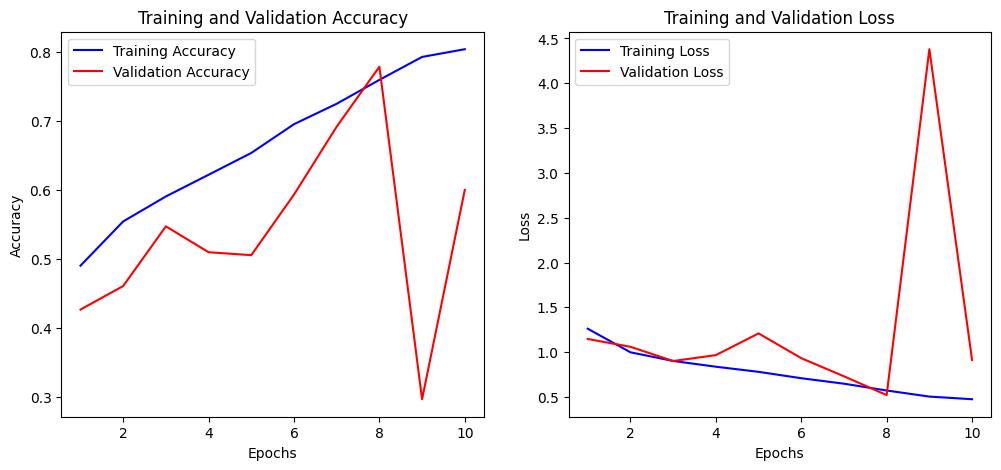

In [10]:
import matplotlib.pyplot as plt

# Access training history from the `history` object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)s
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


74/74 [==============================] - 138s 2s/step


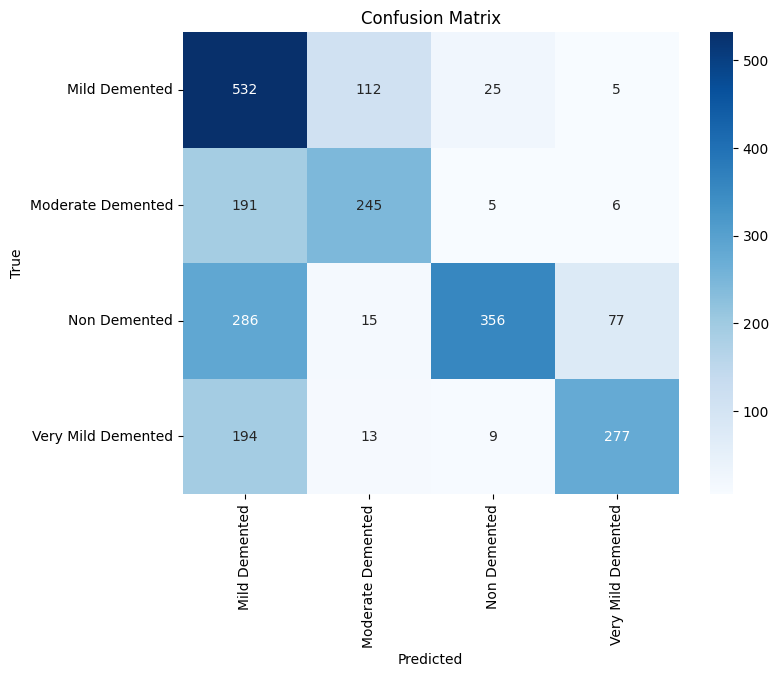

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the predicted class labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels
y_true = np.argmax(y_test_onehot, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very Mild Demented'], yticklabels=['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very Mild Demented'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [37]:
from sklearn.metrics import classification_report

# Generate a classification report
class_report = classification_report(y_true, y_pred_classes, target_names=['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very Mild Demented'])

# Print the classification report
print(class_report)

                    precision    recall  f1-score   support

     Mild Demented       0.44      0.79      0.57       674
 Moderate Demented       0.64      0.55      0.59       447
      Non Demented       0.90      0.49      0.63       734
Very Mild Demented       0.76      0.56      0.65       493

          accuracy                           0.60      2348
         macro avg       0.68      0.60      0.61      2348
      weighted avg       0.69      0.60      0.61      2348



In [ ]:
import matplotlib.pyplot as plt

# Choose an index from your training data
index = 0  # Change this to the index of the image you want to display

# Display the image
plt.imshow(X_train[0])
plt.show()

**Visualization**

In [ ]:
for i in range(len(model.layers)):
	# check for convolutional layer
	if 'conv' not in model.layers[i].name:
		continue
	# get filter weights
	filters, biases = model.layers[i].get_weights()
	print("layer number",i,model.layers[i].name, filters.shape)


In [14]:
# Get weights for a convolutional layer
layer = model.layers[0]
weights = layer.get_weights()

# Split the weights into kernel weights and bias terms
if len(weights) == 2:
    filters, biases = weights
    print(layer.name, "Filters shape:", filters.shape)
    print(layer.name, "Biases shape:", biases.shape)
elif len(weights) == 1:
    filters = weights[0]
    print(layer.name, "Filters shape:", filters.shape)
else:
    print("No valid weights found for the layer")

conv2d Filters shape: (3, 3, 3, 32)
conv2d Biases shape: (32,)


In [15]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

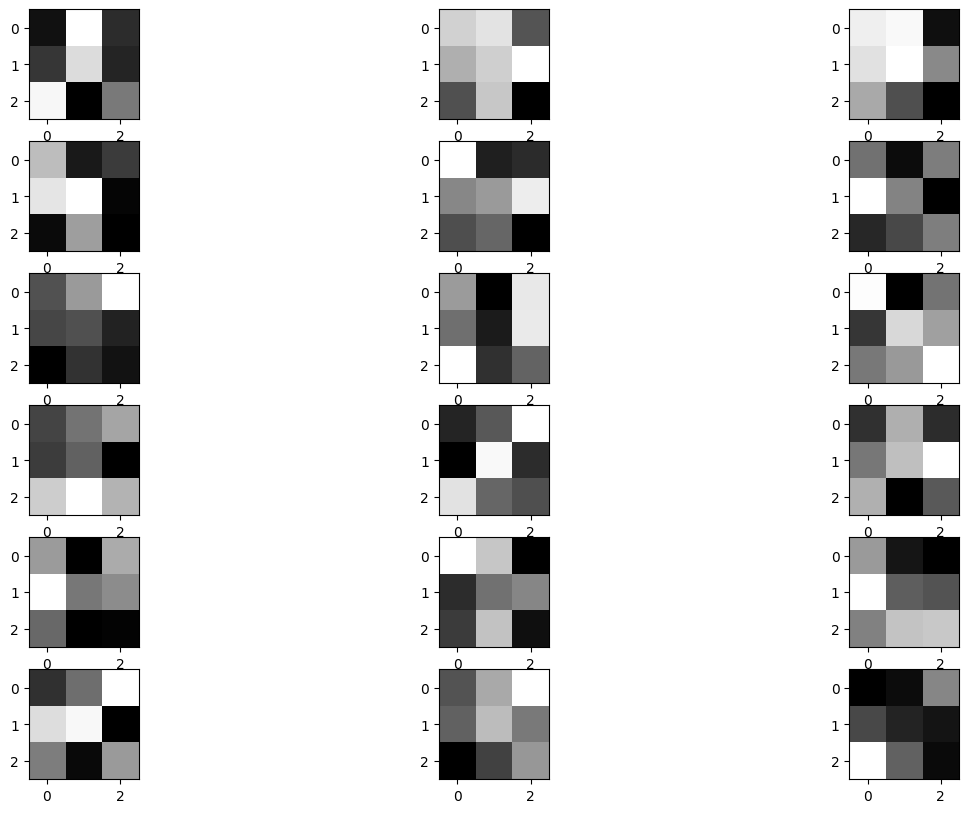

In [16]:
import matplotlib.pyplot as pyplot

n_filters =6
ix=1
fig = pyplot.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
pyplot.show()

In [17]:
from tensorflow.keras.models import clone_model
newmodel = clone_model(model)

**layer 0**

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
modelx = Model(inputs=newmodel.inputs , outputs=newmodel.layers[0].output)

In [26]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = load_img("/content/AD (29).jpg", target_size=(224, 224))

# Convert the image to an array
image = img_to_array(image)
image = np.expand_dims(image, axis=0)  # Add a batch dimension

# Preprocess the image
image = preprocess_input(image)




1/1 [==============================] - 0s 245ms/step


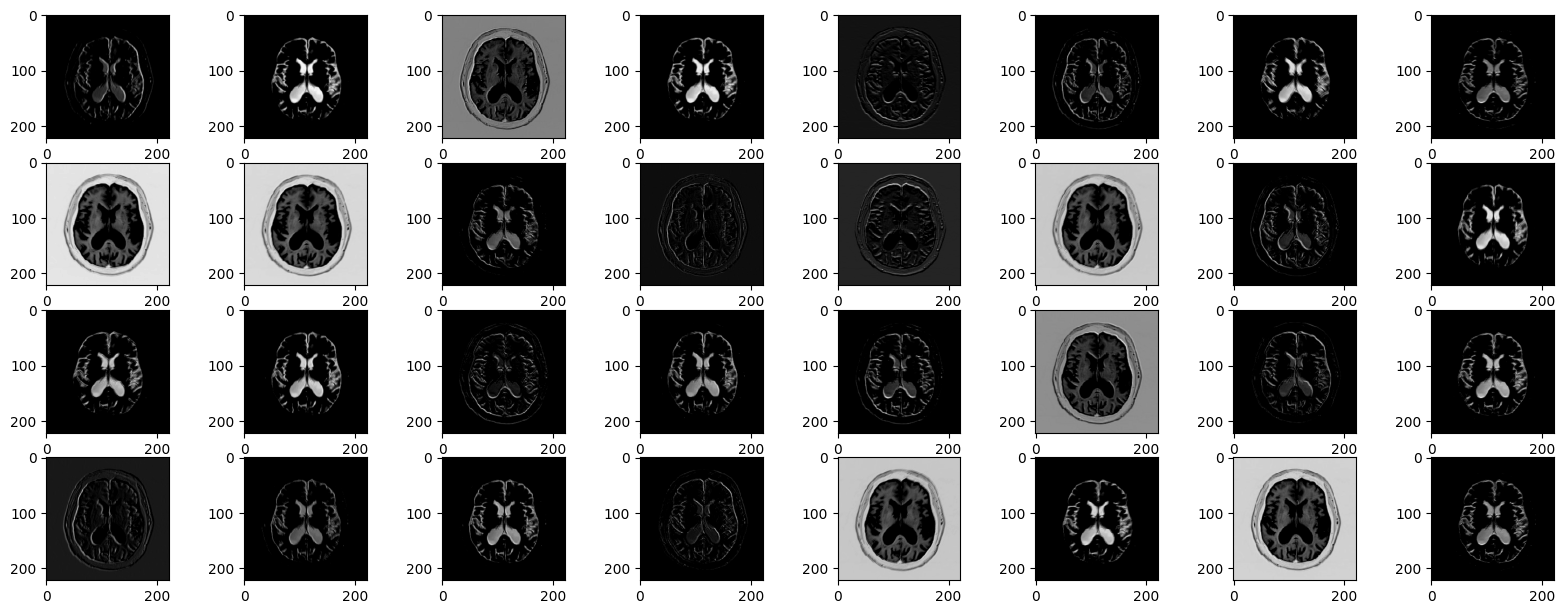

In [27]:
#calculating features_map
features = modelx.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')

pyplot.show()


**layer 3**

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Model
modelx2 = Model(inputs=newmodel.inputs , outputs=newmodel.layers[3].output)

1/1 [==============================] - 0s 78ms/step


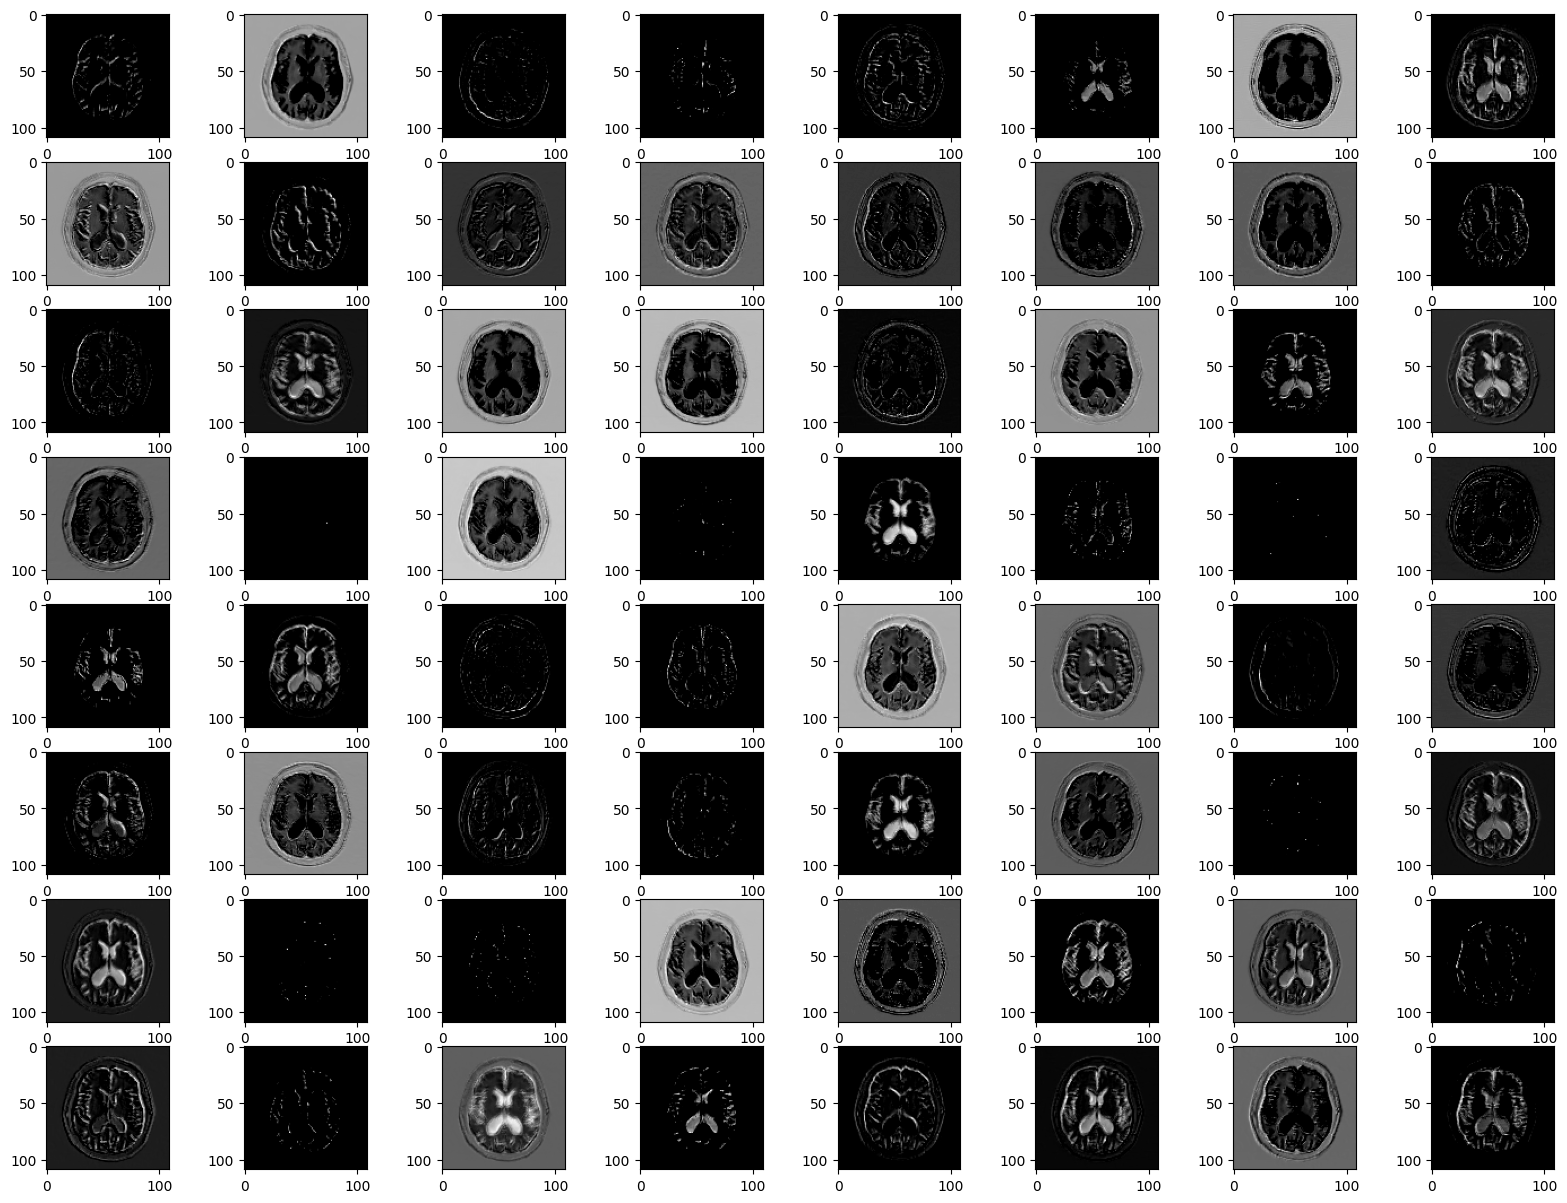

In [29]:
#calculating features_map
features = modelx2.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')

pyplot.show()

In [30]:
newmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                        

**layer 5**

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Model
modelx3 = Model(inputs=newmodel.inputs , outputs=newmodel.layers[5].output)

1/1 [==============================] - 0s 104ms/step


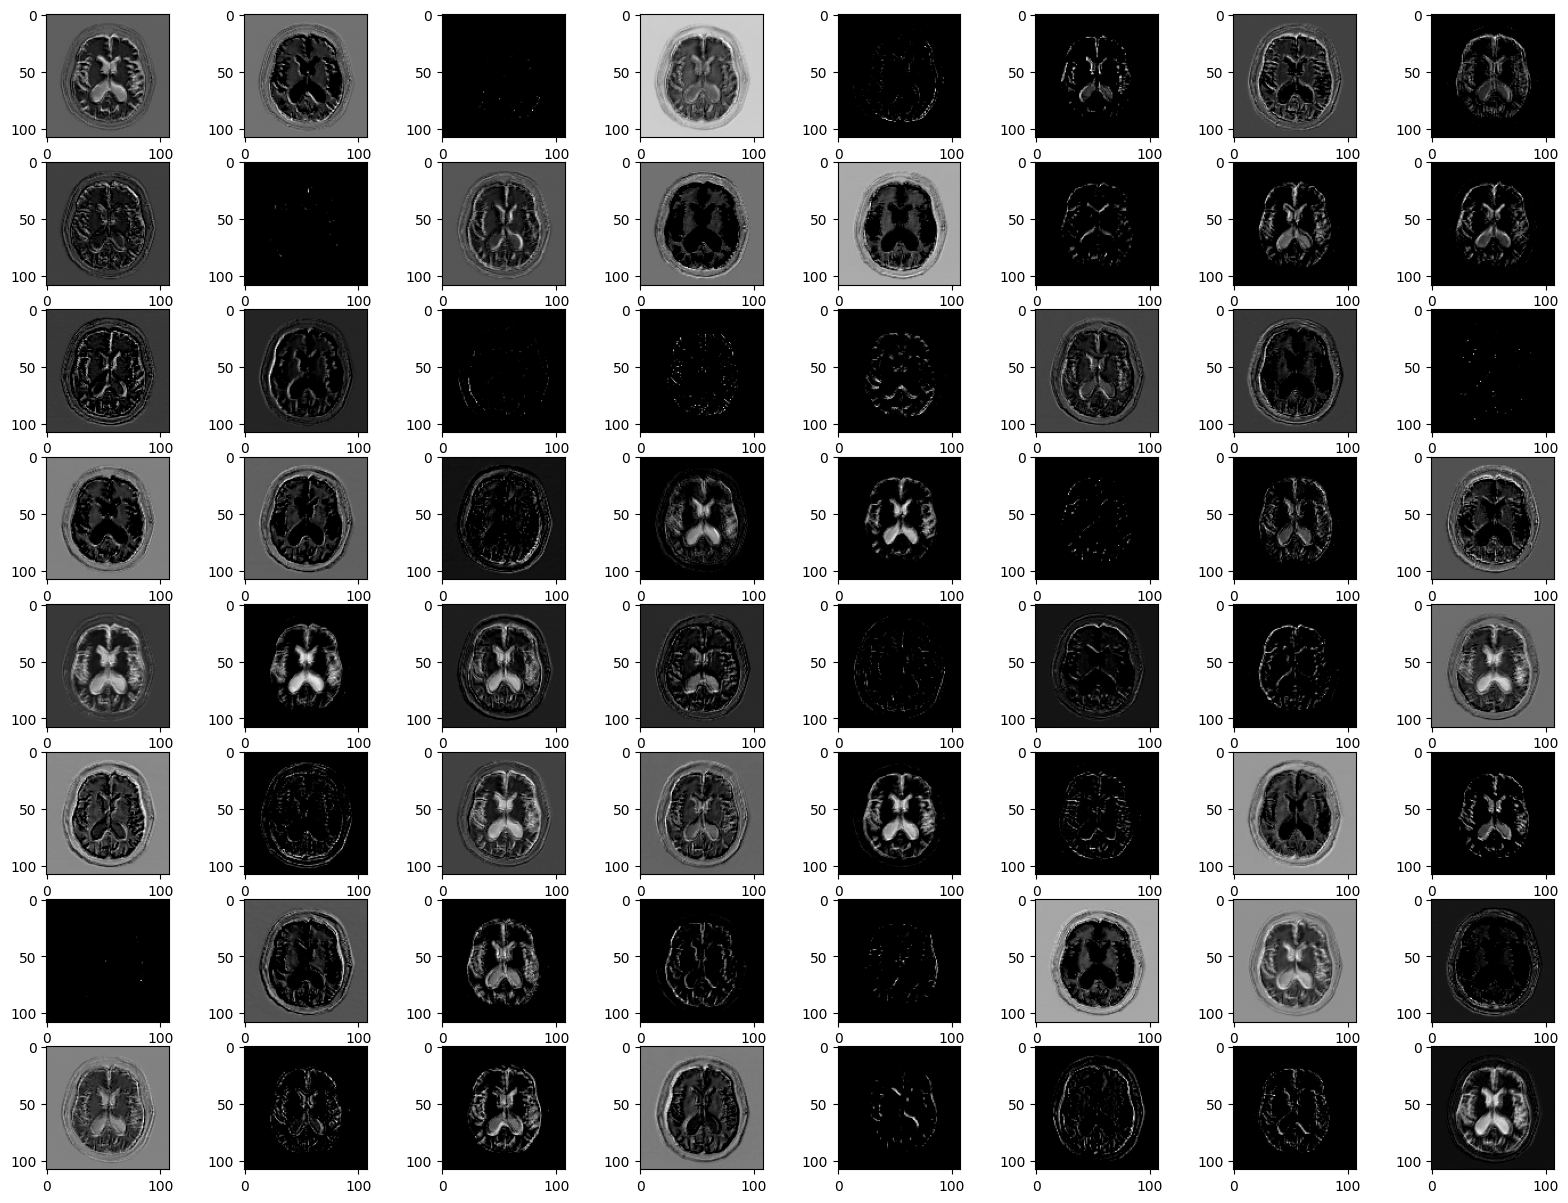

In [32]:
#calculating features_map
features = modelx3.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')

pyplot.show()

**layer 9**

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Model
modelx4 = Model(inputs=newmodel.inputs , outputs=newmodel.layers[9].output)

1/1 [==============================] - 0s 192ms/step


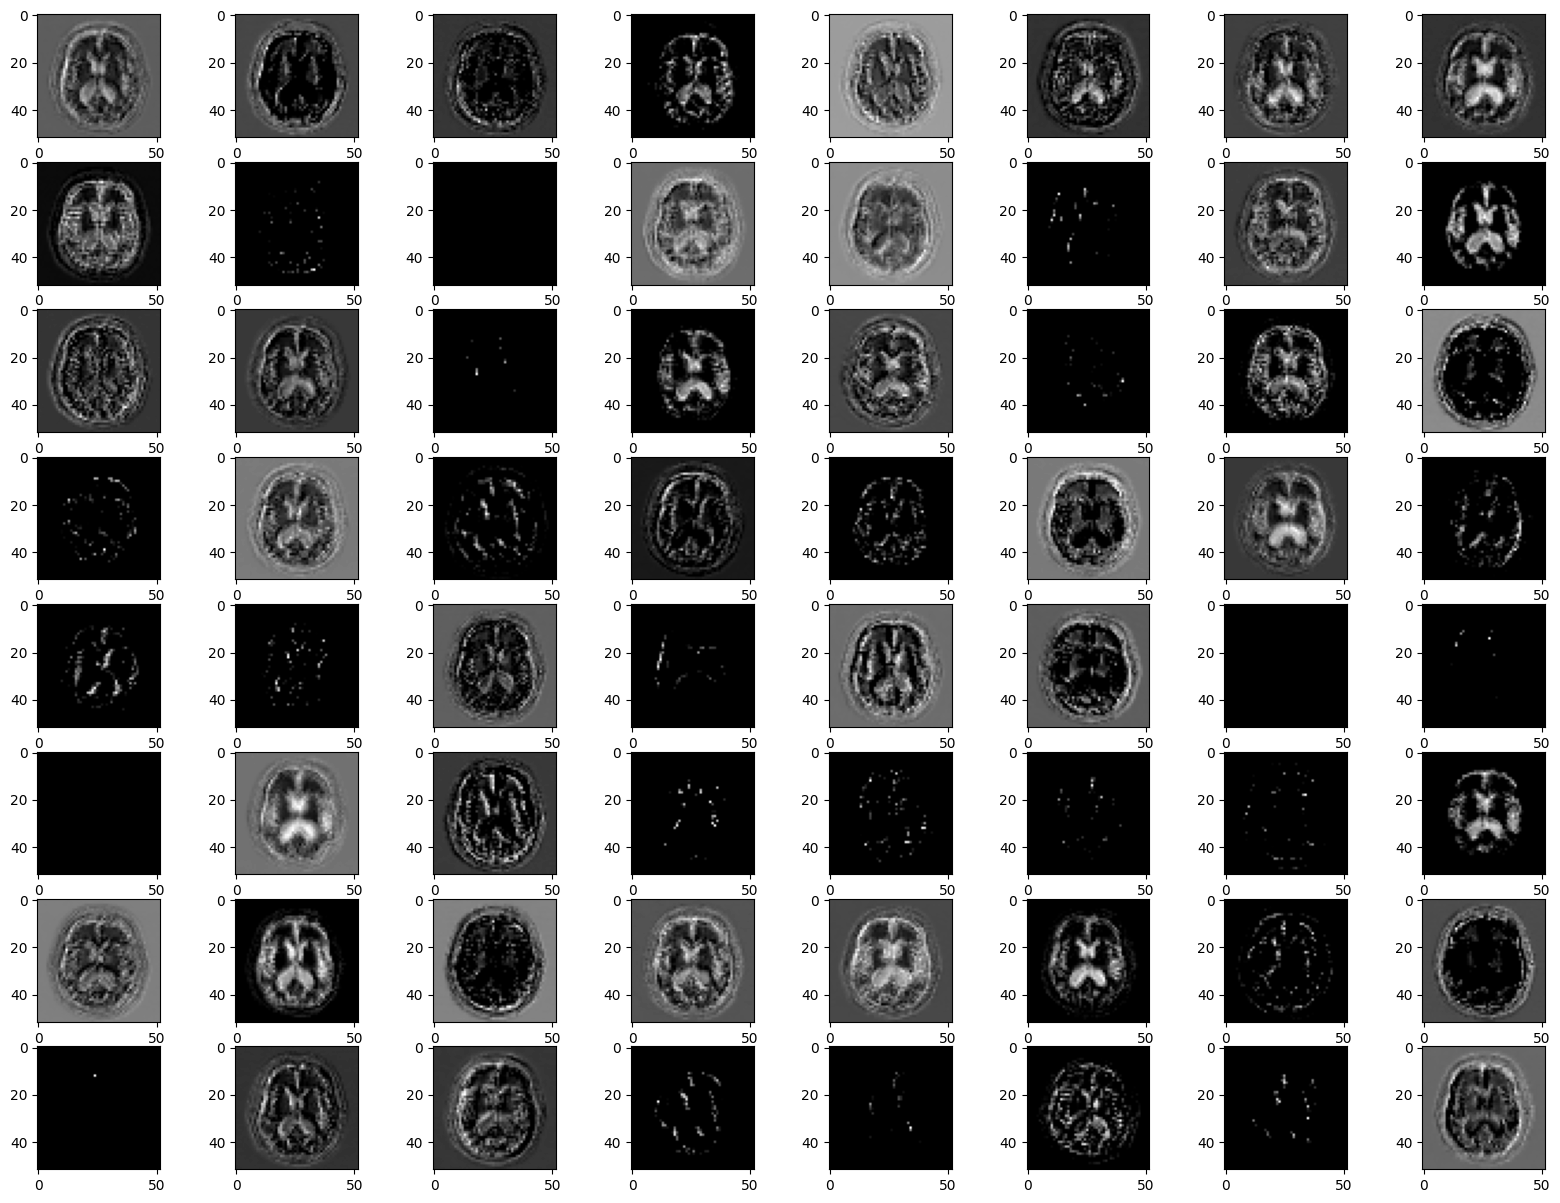

In [34]:
# Calculate feature maps
features = modelx4.predict(image)

# Determine the number of feature maps (subplots) to display
num_feature_maps = min(features.shape[3], 64)  # Limit to a maximum of 64 subplots

fig = pyplot.figure(figsize=(20, 15))
for i in range(1, num_feature_maps + 1):
    pyplot.subplot(8, 8, i)
    pyplot.imshow(features[0, :, :, i - 1], cmap='gray')

pyplot.show()

**layer 11**

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Model
modelx5 = Model(inputs=newmodel.inputs , outputs=newmodel.layers[11].output)

1/1 [==============================] - 0s 161ms/step


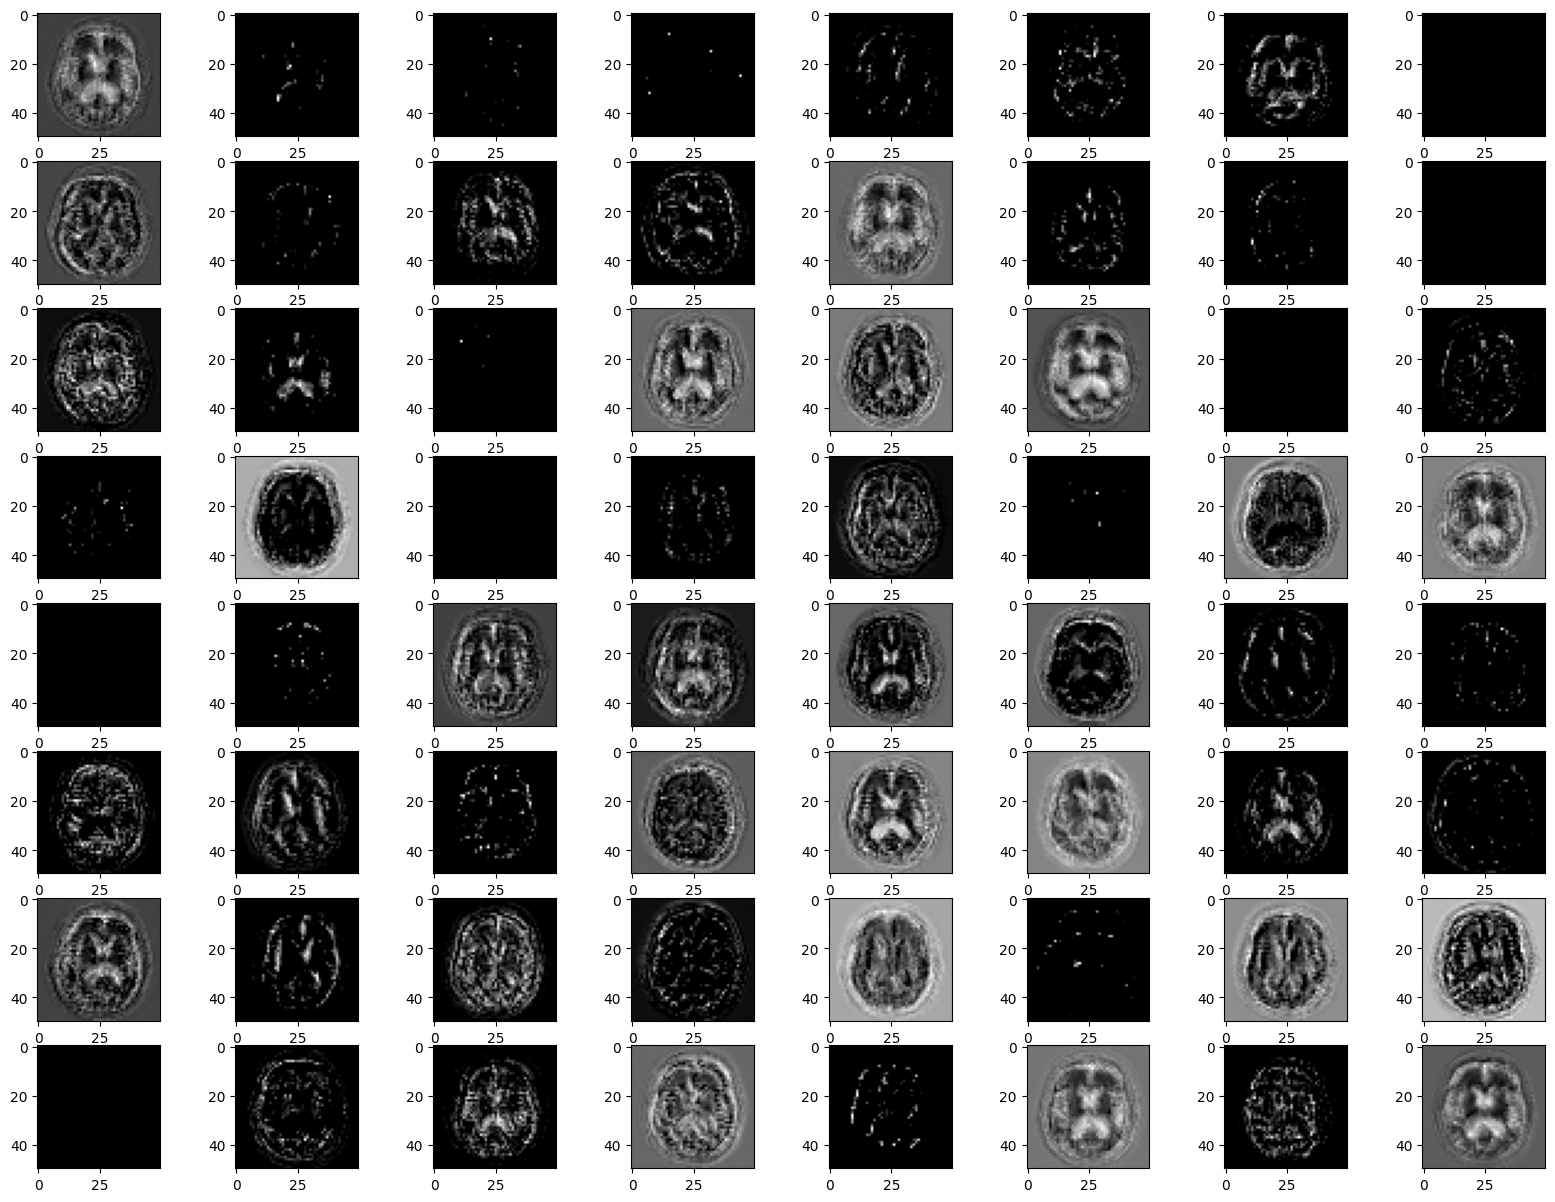

In [36]:
# Calculate feature maps
features = modelx5.predict(image)

# Determine the number of feature maps (subplots) to display
num_feature_maps = min(features.shape[3], 64)  # Limit to a maximum of 64 subplots

fig = pyplot.figure(figsize=(20, 15))
for i in range(1, num_feature_maps + 1):
    pyplot.subplot(8, 8, i)
    pyplot.imshow(features[0, :, :, i - 1], cmap='gray')

pyplot.show()

**sparsing**

In [ ]:
from tensorflow.keras.regularizers import l1

sparsity_factor = 0.005  # Adjust the sparsity factor as needed
model.get_layer('conv2d_8').activity_regularizer = l1(sparsity_factor)

# Retrain the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_onehot, epochs=10, batch_size=32, validation_data=(X_test, y_test_onehot))

# Evaluate the Updated Model
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test Accuracy after adding sparsity: {test_accuracy}")

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the predicted class labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels
y_true = np.argmax(y_test_onehot, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very Mild Demented'], yticklabels=['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very Mild Demented'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
class_report = classification_report(y_true, y_pred_classes, target_names=['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very Mild Demented'])

# Print the classification report
print(class_report)